In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import time
!pip install pympler
from pympler import asizeof
import sys

# Data Loading and Processing
data = pd.read_csv("Dataset.csv")
df = pd.DataFrame(data)
df.head()

,Temperature,CO,Population_Density,Industrial density,Vehicle count,Environmental Pollution Level
0,14.627,0.345,0.146,0.787,2970,25
1,11.513,1.423,0.506,0.735,5560,34
2,7.947,1.076,0.578,0.773,8620,37
3,13.176,0.837,0.498,0.446,9520,30
4,11.751,0.305,0.120,0.613,3100,20


In this part of code, we arranged the all libraries that we will need. Then, we load the dataset.

In [3]:
# Features and Target Value
features = ["Temperature", "CO", "Population_Density", "Industrial density", "Vehicle count"]
label = "Environmental Pollution Level"

X = data[features]
y = data[label]

print(df.shape)

(1200, 6)


We defined the feature and the label columns. We printed the shape of the dataset. We have 1200 records and 6 columns.

In [7]:
# Check for missing data
df.isnull().sum()

# Selected interaction terms
X['Population_Vehicle_Interaction'] = X['Population_Density'] * X['Vehicle count']
X['CO_Industrial_Interaction'] = X['CO'] * X['Industrial density']

# Update features
features_with_interaction = features + ['Population_Vehicle_Interaction', 'CO_Industrial_Interaction']

# Data Normalization
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Save normalized data to CSV
pd.DataFrame(X_normalized).to_csv('normalized_data.csv', index=False)

# Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X)
print(X_normalized)

(960, 7) (240, 7) (960,) (240,)
      Temperature     CO  Population_Density  Industrial density  \
0          14.627  0.345               0.146               0.787   
1          11.513  1.423               0.506               0.735   
2           7.947  1.076               0.578               0.773   
3          13.176  0.837               0.498               0.446   
4          11.751  0.305               0.120               0.613   
...           ...    ...                 ...                 ...   
1195       13.834  1.097               0.082               0.503   
1196       16.016  0.692               0.390               0.578   
1197       17.106  1.613               0.403               0.644   
1198       13.678  1.069               0.320               0.448   
1199       12.610  2.760               0.372               0.721   

      Vehicle count  Population_Vehicle_Interaction  CO_Industrial_Interaction  
0              2970                          433.62                   

In this part of the code we are preparing the data. Firstly we checked if we have missing values, we combined the features and make them one column. Secondly we normalized the data. Then we printed both of the steps and saw how the data changed after the operations.

Execution time: 0.0262 seconds

Linear Regression Performance:
Mean Squared Error (MSE): 7.3200
Mean Absolute Error (MAE): 1.8927
R² Score: 0.9189
Linear Regression Model Memory Usage: 0.0014 MB

Linear Regression - Feature Importance:
                          Feature  Coefficient
0                     Temperature     0.762551
1                              CO     4.604774
2              Population_Density    22.302079
3              Industrial density    14.699695
4                   Vehicle count     0.000051
5  Population_Vehicle_Interaction     0.000193
6       CO_Industrial_Interaction    -1.071528


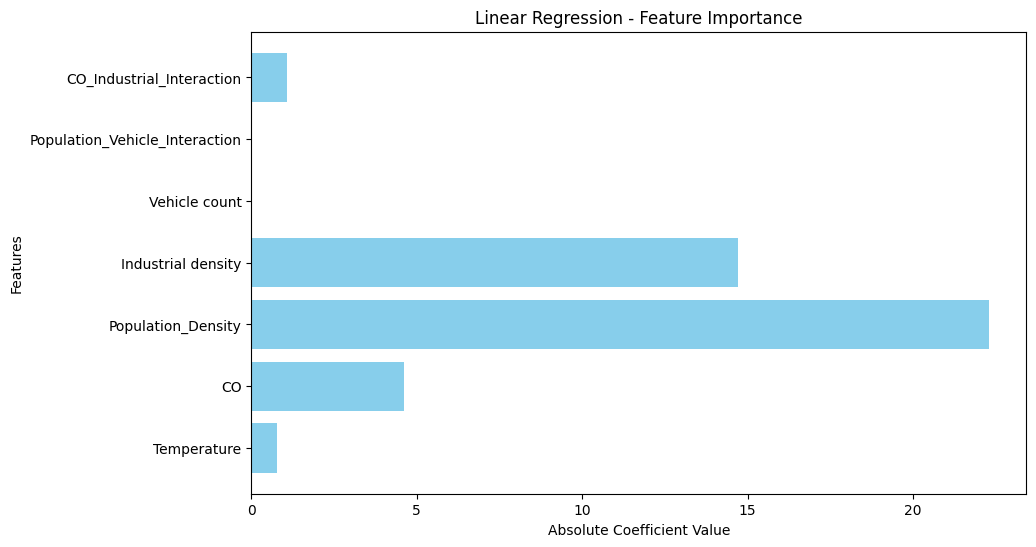

In [5]:
# Linear Regression Model
start_time = time.time()

# Fit the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Prediction
y_pred_lr = linear_model.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.4f} seconds")

# Performance Metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\nLinear Regression Performance:")
print(f"Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lr:.4f}")
print(f"R² Score: {r2_lr:.4f}")

# Model Memory Usage
model_memory_usage = asizeof.asizeof(linear_model)
print(f"Linear Regression Model Memory Usage: {model_memory_usage / (1024 ** 2):.4f} MB")

# Feature Importance
feature_importance_lr = pd.DataFrame({
    "Feature": features_with_interaction,  # Updated feature list with interaction terms
    "Coefficient": linear_model.coef_
})
print("\nLinear Regression - Feature Importance:")
print(feature_importance_lr)

# Feature Importance Visualization
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_lr["Feature"], abs(feature_importance_lr["Coefficient"]), color='skyblue')
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Features")
plt.title("Linear Regression - Feature Importance")
plt.show()

Our first algorithm is Linear Regression. We applied the algorithm and calculated the metrics, time and storage values. Also, we printed a feature importance graph to see how features affect the label.,

Execution time: 7.4145 seconds

Random Forest Regressor Performance:
Mean Squared Error (MSE): 9.8593
Mean Absolute Error (MAE): 2.3094
R² Score: 0.8907
Random Forest Model Memory Usage: 0.1248 MB

Random Forest - Feature Importance:
                          Feature  Importance
0                     Temperature    0.439392
1                              CO    0.127016
2              Population_Density    0.241954
3              Industrial density    0.028952
4                   Vehicle count    0.001976
5  Population_Vehicle_Interaction    0.006291
6       CO_Industrial_Interaction    0.154419


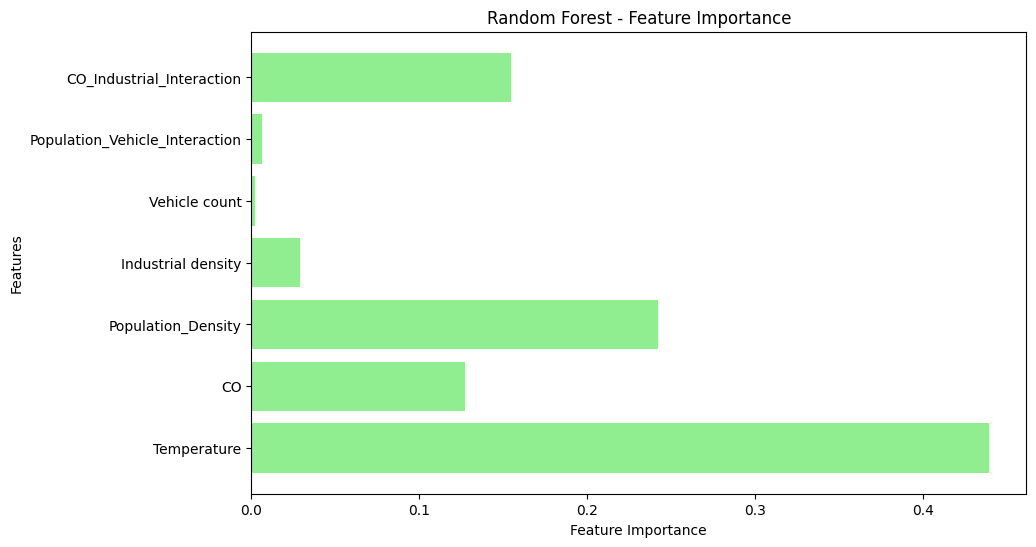

In [6]:
# Random Forest Regressor Model
start_time = time.time()

rf_model = RandomForestRegressor(
    criterion='absolute_error',
    random_state=42,
    n_estimators=300,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1
)
rf_model.fit(X_train, y_train)

# Prediction
y_pred_rf = rf_model.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.4f} seconds")

# Performance Metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Performance:")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")

# Model Memory Usage
model_memory_usage_rf = asizeof.asizeof(rf_model)
print(f"Random Forest Model Memory Usage: {model_memory_usage_rf / (1024 ** 2):.4f} MB")

# Feature Importance
feature_importance_rf = pd.DataFrame({
    "Feature": features_with_interaction,  # Updated feature list with interaction terms
    "Importance": rf_model.feature_importances_
})

print("\nRandom Forest - Feature Importance:")
print(feature_importance_rf)

# Feature Importance Visualization
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_rf["Feature"], feature_importance_rf["Importance"], color='lightgreen')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest - Feature Importance")
plt.show()

The second algorithm is the Random Forest Regressor. We applied the algorithm and calculated metrics, time, and storage values. We printed graphs to see how features affect the label.

In [51]:
# Performance Comparison
print("\nModel Performance Comparison:")
print(f"Linear Regression - MSE: {mse_lr}, MAE: {mae_lr}, R2: {r2_lr}")
print(f"Random Forest - MSE: {mse_rf}, MAE: {mae_rf}, R2: {r2_rf}")


Model Performance Comparison:
Linear Regression - MSE: 7.319976072706784, MAE: 1.8927394319595061, R2: 0.9188617020046957
Random Forest - MSE: 9.859260613425926, MAE: 2.3093819444444446, R2: 0.8907149944590314


Finally, we want to do a comparison between the algorithms. After we see the all metrics together, we can say that Linear Regression is more successful than Random Forest Algorithm for this problem and dataset.

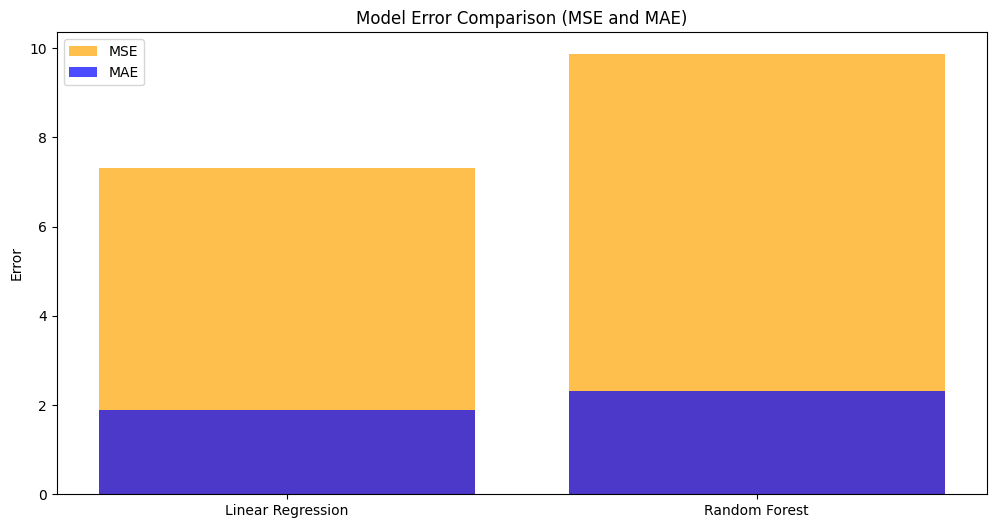

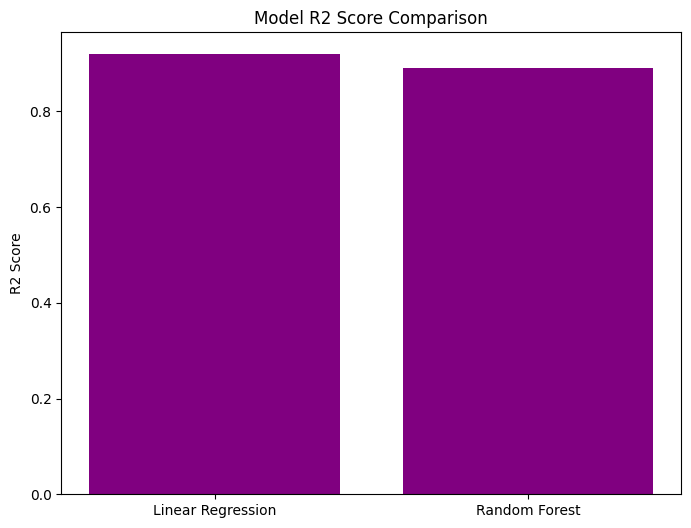

In [52]:
# Visualization
models = ["Linear Regression", "Random Forest"]
mse_values = [mse_lr, mse_rf]
mae_values = [mae_lr, mae_rf]
r2_values = [r2_lr, r2_rf]

plt.figure(figsize=(12, 6))
plt.bar(models, mse_values, color='orange', alpha=0.7, label='MSE')
plt.bar(models, mae_values, color='blue', alpha=0.7, label='MAE')
plt.ylabel("Error")
plt.title("Model Error Comparison (MSE and MAE)")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(models, r2_values, color='purple')
plt.ylabel("R2 Score")
plt.title("Model R2 Score Comparison")
plt.show()

We visualize the outputs that we have to see the results.